In [3]:
#module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#

#SKLEARN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC



In [4]:
from google.colab import drive
drive.mount('/content/drive' , force_remount = 'True')
#!ls "/content/drive/My Drive"

Mounted at /content/drive


1. Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data :
***The main objective of the analysis is to build a model to predict default on a loan based on customer characteristics. ***

2. Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis:
***The data includes characteristics of 1000 loanee (cutomer) which are (1) their id  (2) no. of credit lines outstanding, (3) loan amount outstanding (4) total_debt_outstanding (5) income of the laonee (6) job exp of loanee (7) their fico_score-credit score. Using these info our plan is to predict whether the loanee will default on their loans or not (binary classification).    ***

In [5]:
filepath = "/content/drive/My Drive/Colab Notebooks/Task 3 and 4_Loan_Data.csv"
data = pd.read_csv(filepath)
data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


3. Brief summary of data exploration and actions taken for data cleaning and feature engineering :
***The data is obtained from a job simulation platform Forage partnered with JP Morgans Chase. The data was checked for any missing or NAN values. Initial characteristics of the data is checked by histogramming individal features and plotting their relation with the actual data "default". ***

In [6]:
print (data.shape)
data.info()

(10000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


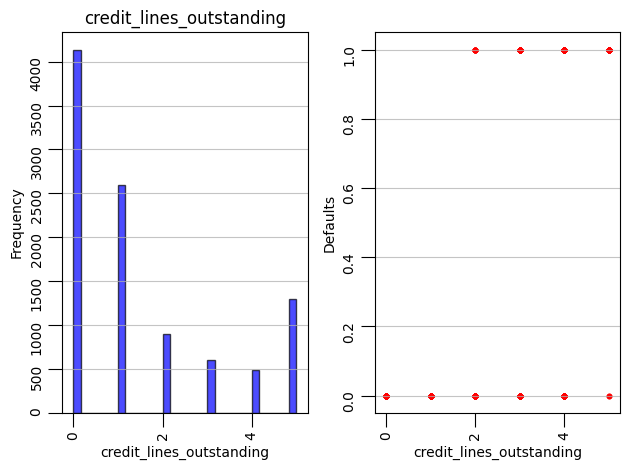

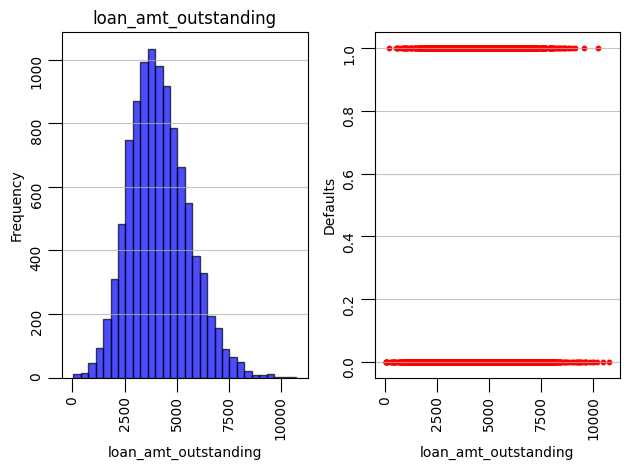

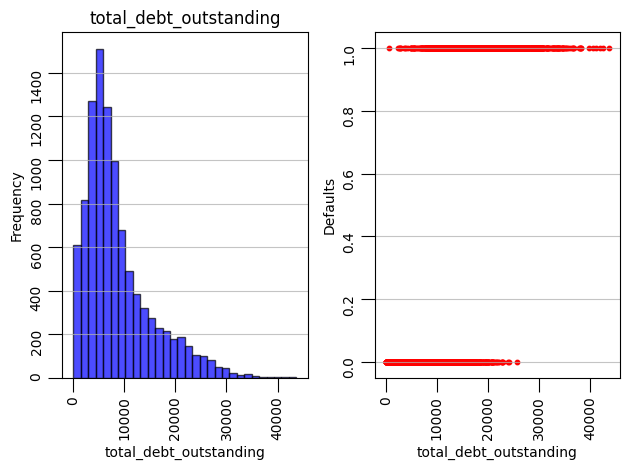

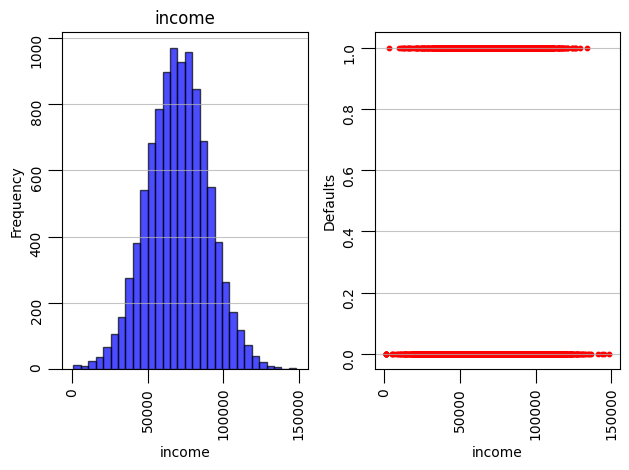

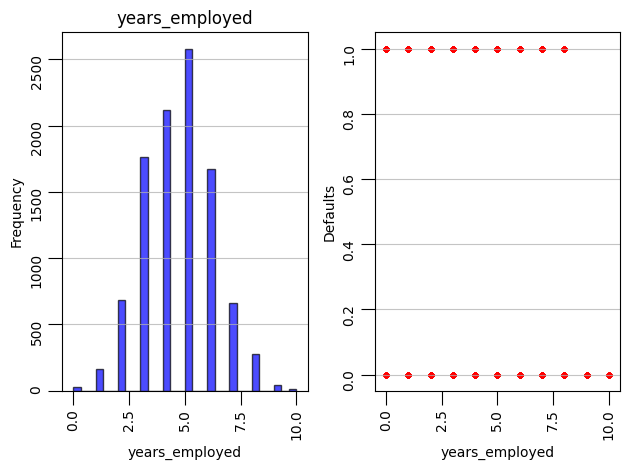

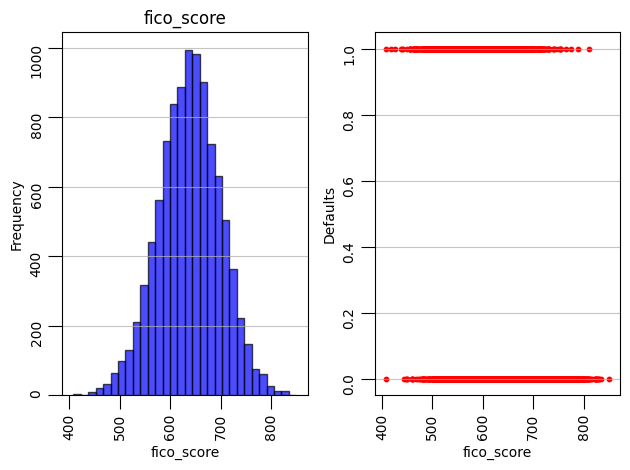

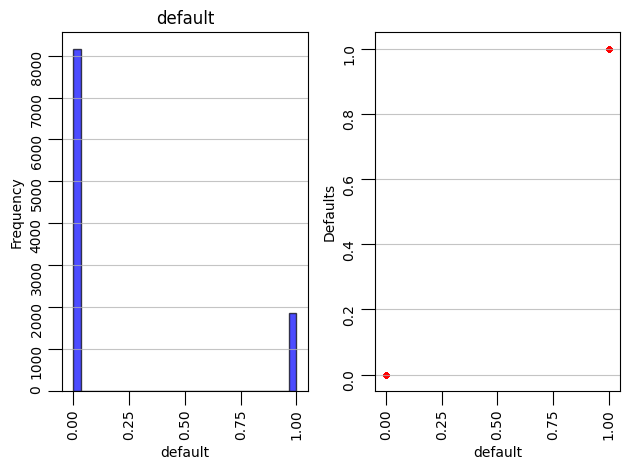

In [7]:
headers = data.columns.tolist()
#PLOTTING

for i in range(1,len(headers)):
  fig, axes = plt.subplots(1, 2)

  axes[0].hist(data[headers[i]], bins=30, color='blue', edgecolor='black', alpha=0.7)
  axes[0].set_title(headers[i])
  axes[0].set_xlabel(headers[i])
  axes[0].set_ylabel("Frequency")

  axes[0].grid(axis='y', alpha=0.75)
  axes[0].tick_params(size=10, rotation=90)



  axes[1].scatter(data[headers[i]], data[headers[-1]], color='red', marker='o', s=10)
  axes[1].set_xlabel(headers[i])
  axes[1].set_ylabel('Defaults')

  axes[1].grid(axis='y', alpha=0.75)
  axes[1].tick_params(size=10, rotation=90)

  fig.tight_layout()


4. Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.

In [8]:
data.corr()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
customer_id,1.000000,0.006729,-0.013857,0.003541,-0.008064,-0.008098,0.008044,0.006927
credit_lines_outstanding,0.006729,1.000000,0.080249,0.852210,0.022272,-0.087900,-0.258177,0.862815
loan_amt_outstanding,-0.013857,0.080249,1.000000,0.397403,0.835815,-0.158416,-0.031373,0.098978
total_debt_outstanding,0.003541,0.852210,0.397403,1.000000,0.394397,-0.174353,-0.232246,0.758868
income,-0.008064,0.022272,0.835815,0.394397,1.000000,0.001814,-0.010528,0.016309
years_employed,-0.008098,-0.087900,-0.158416,-0.174353,0.001814,1.000000,0.255873,-0.284506
fico_score,0.008044,-0.258177,-0.031373,-0.232246,-0.010528,0.255873,1.000000,-0.324515
default,0.006927,0.862815,0.098978,0.758868,0.016309,-0.284506,-0.324515,1.000000


In [9]:
# Data : Features and Target
X=data.iloc[:,1:-1]
Y=data.iloc[:,-1]

#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)


Accuracy: 1.00
Confusion Matrix:
 [[1620    1]
 [   5  374]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1621
           1       1.00      0.99      0.99       379

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000



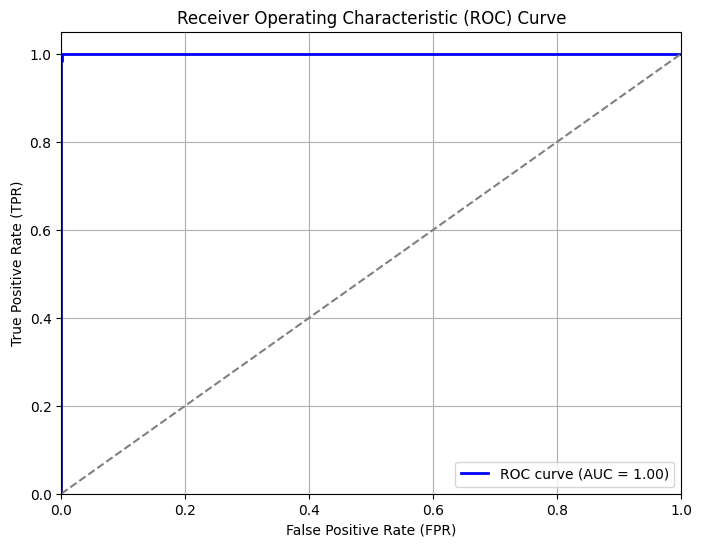

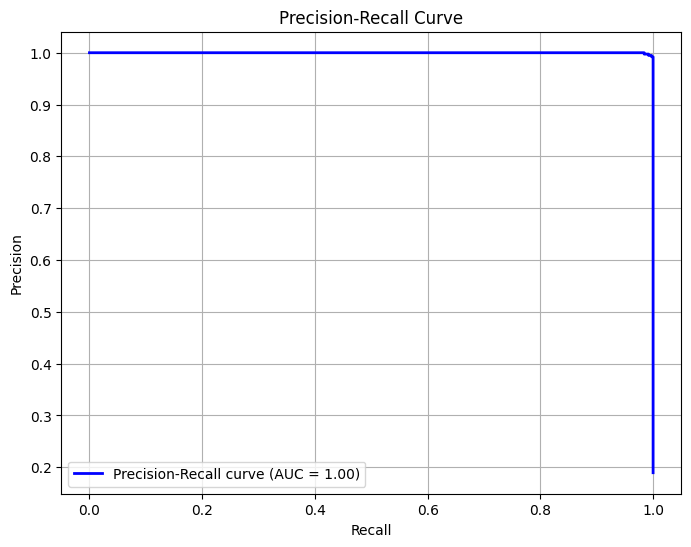

In [10]:
#LOGISTIC REGRESSION

# Create and train the model
model = LogisticRegression(max_iter=1000)
lr =model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class (class 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier (diagonal line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute the AUC for Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

Accuracy: 0.98
Confusion Matrix:
 [[1611   10]
 [  32  347]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1621
           1       0.97      0.92      0.94       379

    accuracy                           0.98      2000
   macro avg       0.98      0.95      0.97      2000
weighted avg       0.98      0.98      0.98      2000



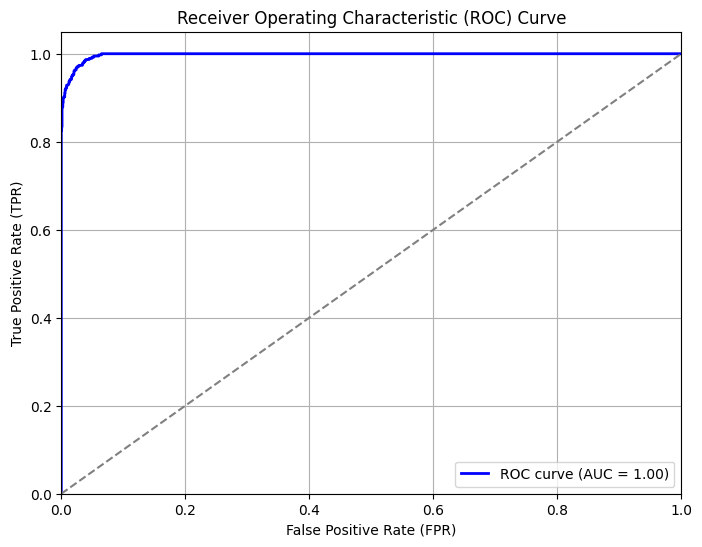

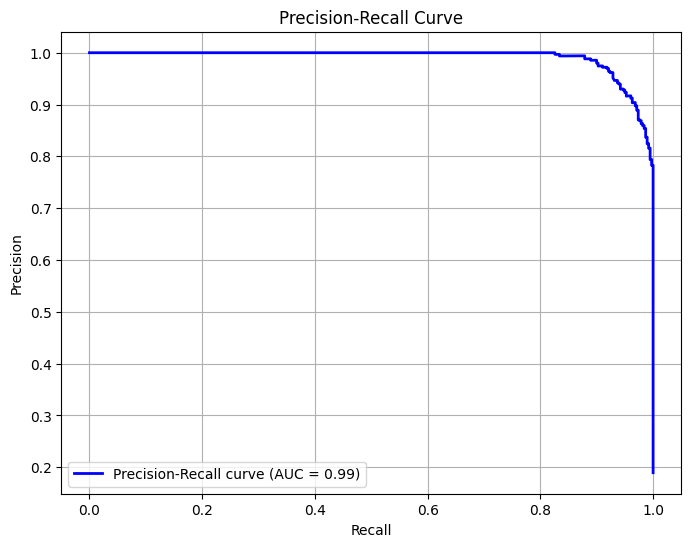

In [14]:
#Support Vector Machine

# Create and train the model
model = SVC(kernel='rbf', probability=True, random_state=42)
lr_l1 = model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class (class 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier (diagonal line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute the AUC for Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

Accuracy: 0.99
Confusion Matrix:
 [[1617    4]
 [   6  373]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1621
           1       0.99      0.98      0.99       379

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



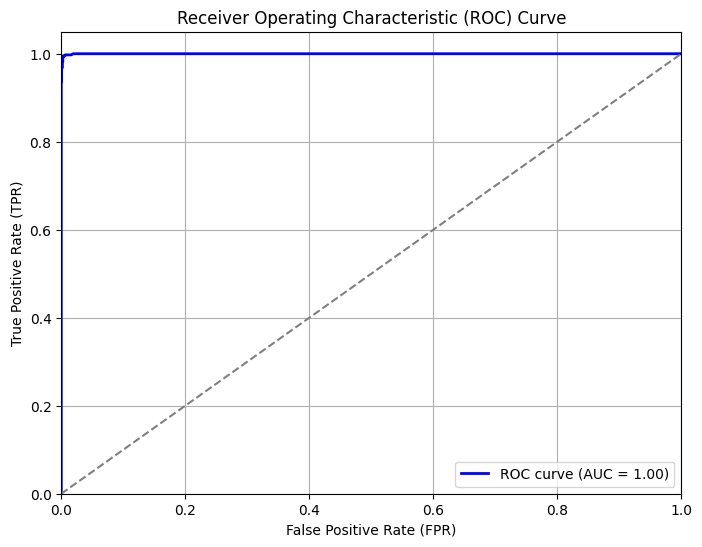

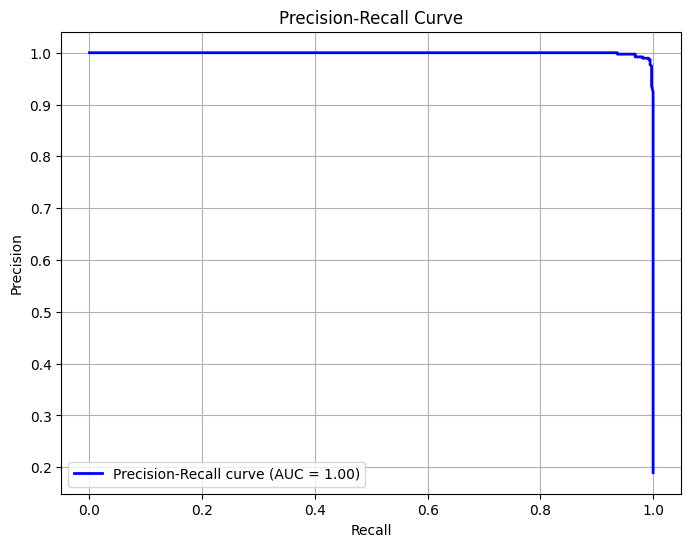

In [16]:
#Random Forest

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_l2=model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class (class 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier (diagonal line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute the AUC for Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

5. Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.
***The three model: Logistic Regression (linear), Support Vector Machine with kernel(non-linear), Random Forest methods (non-linear, ensemble methods). From the ROC curve--> Logistic regression ~ Random Forest > SVM. So, the classification problem of default or not from customer characteristics (features) is a fairly linear problem.   ***

6. A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability:

***I would use Logistic regression as it is computationally less intensive and provides same order of accuracy if not more than the other complex models like kernel SVM and Random Forest. Also, LR allow for more interpretibility as it provides info on feature coefficients.***

In [24]:
#Interpretibility of Logistic regression

list_coef =lr.coef_

for i in range(1, len(headers)-1):
  print(headers[i], "   =  ", list_coef[0][i-1])

credit_lines_outstanding    =   7.241760214080861
loan_amt_outstanding    =   0.00047443582874206314
total_debt_outstanding    =   0.0014530374032663297
income    =   -0.00032318725558629904
years_employed    =   -2.8189117226982243
fico_score    =   -0.03467756671655343


7. Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.
***Since this is linear model of the features whose output is sent through a sigmoid function to assess classificaton, we find primarility two customer characteristics : no. of credit linesoutstanding (positively) and years employed (negatively), affect loan defaults. ***

8. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.

***Much could be improved in terms of maintaining independency mainly linear as suggested from the pearson correlation values among the features. Although regularization is inherent in sklearn but explicit use of other regularization methods like Ridge could help with overfitting. Fine tuning the other models could help. Also, Neural networks, is an option to capture more complex relationships though less interpretable.  ***